#NAME:CHANDANA DONGRE
#SRN:PES2UG21CS134
#SECTION:C

#Data Description Statistics
a. What is the structure (shape) of the dataset?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv("diabetes-case-study.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(dataset.shape)
print(dataset.size)

(768, 9)
6912


b. Show the min, max, and mean of Glucose,......?

In [ ]:
dataset.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [ ]:
dataset.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [ ]:
dataset.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

#Pre-processing
a.Check for NULLs/Duplicates. Drop ttributes with more than 20% data missing

In [ ]:
dataset = dataset.replace('-', np.nan)

In [ ]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.sort_values("Pregnancies", inplace = True)
bool_series = dataset["Pregnancies"].duplicated()

In [ ]:
dataset.sort_values("Glucose", inplace = True)
bool_series = dataset["Glucose"].duplicated()

In [ ]:
dataset.sort_values("BloodPressure", inplace = True)
bool_series = dataset["BloodPressure"].duplicated()

In [ ]:
dataset.sort_values("SkinThickness", inplace = True)
bool_series = dataset["SkinThickness"].duplicated()

In [ ]:
dataset.sort_values("Insulin", inplace = True)
bool_series = dataset["Insulin"].duplicated()

In [ ]:
dataset.sort_values("BMI", inplace = True)
bool_series = dataset["BMI"].duplicated()

In [ ]:
dataset.sort_values("DiabetesPedigreeFunction", inplace = True)
bool_series = dataset["DiabetesPedigreeFunction"].duplicated()

In [ ]:
dataset.sort_values("Age", inplace = True)
bool_series = dataset["Age"].duplicated()

In [ ]:
dataset.head()
dataset[bool_series]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
566,1,99,72,30,18,38.6,0.412,21,0
627,0,132,78,0,0,32.4,0.393,21,0
392,1,131,64,14,415,23.7,0.389,21,0
163,2,100,64,23,0,29.7,0.368,21,0
713,0,134,58,20,291,26.4,0.352,21,0
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1
552,6,114,88,0,0,27.8,0.247,66,0
537,0,57,60,0,0,21.7,0.735,67,0
363,4,146,78,0,0,38.5,0.520,67,1


In [ ]:
dataset.duplicated()

268    False
566    False
627    False
392    False
163    False
       ...  
684    False
123    False
666    False
453    False
459    False
Length: 768, dtype: bool

b. Fill remaining NULLs with mode values

since there are no null or duplicate values in dataset we dont replace it by mode

In [ ]:
dataset.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


c. Are there categorical columns ?
Yes there are 9 categorical column

In [ ]:
print("Pregnancies",dataset['Pregnancies'].unique())
print("Glucose",dataset['Glucose'].unique())
print("BloodPressure",dataset['BloodPressure'].unique())
print("SkinThickness",dataset['SkinThickness'].unique())
print("Insulin",dataset['Insulin'].unique())
print("BMI",dataset['BMI'].unique())
print("Age",dataset['Age'].unique())
print("DiabetesPedigreeFunction",dataset['DiabetesPedigreeFunction'].unique())

Pregnancies [ 0  1  2  4  3  8  6  7  5  9 10 11 13 14 12 15 17]
Glucose [102  99 132 131 100 134  94 117  84  97   0 114 115  96 125  80 143 101
  73 139 116  91 105 130  71  78  87 118 177 109 113 126 142  90  89 138
 124 108 151 111 112 137  88 106 141 179 103  93  83 104  98 181 136  74
  92  95 119 120 173 148  81 175  56 123  79 199 188 127 122 128 107  82
 165 154 129 140 121  68 153 174 157 193 158 162  86 135  77 171 147  76
 144 180 155 166 146 110 152  85 198 172 163 196 189 182 170 167 195 184
 169 197 145 164 183 156  75 168 191 187  44 133 159 186 150  72 160  57
 178 194  62  65 149  67  61 161 176 190]
BloodPressure [ 52  72  78  64  58  70  90   0  74  66  96  55  50  76  62  68  88  60
  80  56  82  75  24  86  65  84  54  48  44 100  46  85  94 110  30  38
 122  98  92  40 108 104 106 114 102  61  95]
SkinThickness [ 0 30 14 23 20 27 19 36 22 17 10 15 28 24 50 29 18  8 16 26 35 41 32 46
 13 31 11 37 42 25 40 33 39 21 43 38 34 45 12 54 47 52 56 63 48 44 49 51
 60  7 9

#Data Visualization
a.Make Histogram, and whisker plots to understand the meaning of the encoding.
SOLN:I didnt do data encoding because the dataset had all numerical categorical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16ec64e310>,
      dtype=object)

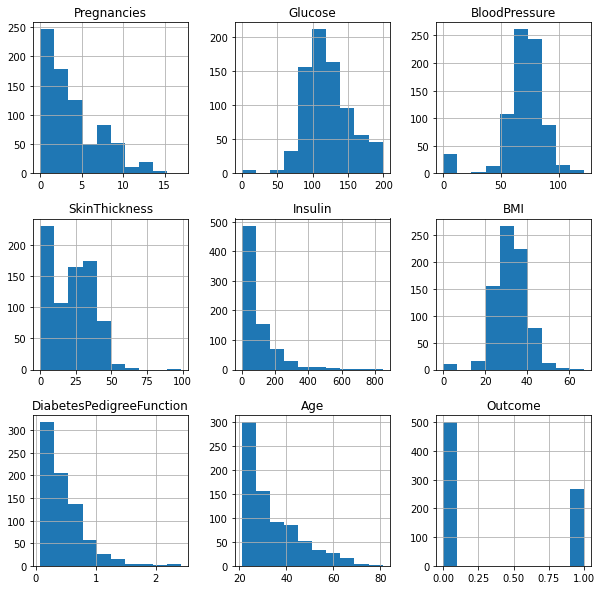

In [ ]:
dataset.hist(figsize=(10,10))


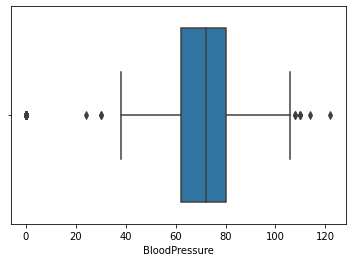

In [ ]:
sns.boxplot(dataset["BloodPressure"])

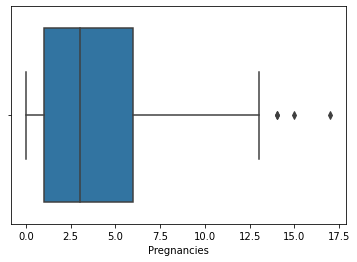

In [ ]:
sns.boxplot(dataset["Pregnancies"])

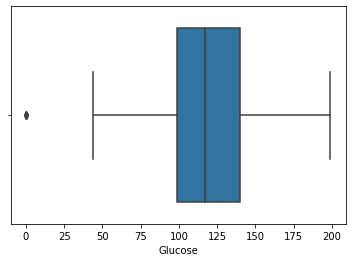

In [ ]:
sns.boxplot(dataset["Glucose"])

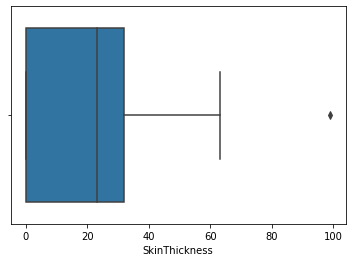

In [ ]:
sns.boxplot(dataset["SkinThickness"])

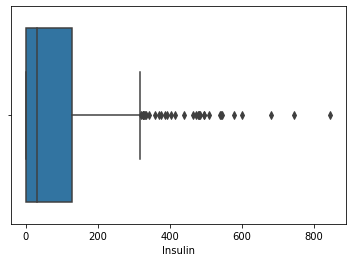

In [ ]:
sns.boxplot(dataset["Insulin"])

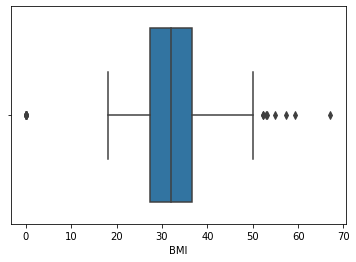

In [ ]:
sns.boxplot(dataset["BMI"])

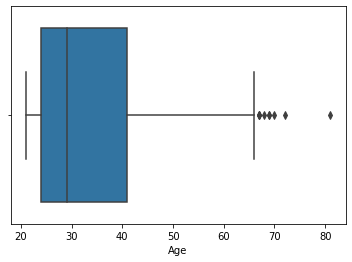

In [ ]:
sns.boxplot(dataset["Age"])

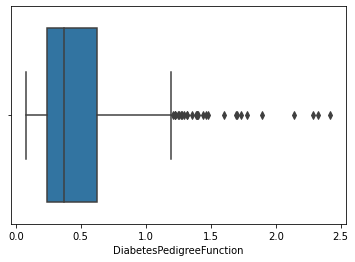

In [ ]:
sns.boxplot(dataset["DiabetesPedigreeFunction"])

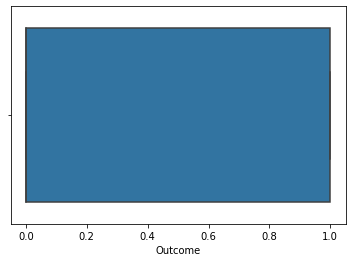

In [ ]:
sns.boxplot(dataset["Outcome"])

#Hypothesis Testing
a. Perform correlation Analysis.

In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
print("Pregnancies",dataset['Pregnancies'].unique())
print("Glucose",dataset['Glucose'].unique())
print("BloodPressure",dataset['BloodPressure'].unique())
print("SkinThickness",dataset['SkinThickness'].unique())
print("Insulin",dataset['Insulin'].unique())
print("BMI",dataset['BMI'].unique())
print("Age",dataset['Age'].unique())
print("DiabetesPedigreeFunction",dataset['DiabetesPedigreeFunction'].unique())

Pregnancies [ 0  1  2  4  3  8  6  7  5  9 10 11 13 14 12 15 17]
Glucose [102  99 132 131 100 134  94 117  84  97   0 114 115  96 125  80 143 101
  73 139 116  91 105 130  71  78  87 118 177 109 113 126 142  90  89 138
 124 108 151 111 112 137  88 106 141 179 103  93  83 104  98 181 136  74
  92  95 119 120 173 148  81 175  56 123  79 199 188 127 122 128 107  82
 165 154 129 140 121  68 153 174 157 193 158 162  86 135  77 171 147  76
 144 180 155 166 146 110 152  85 198 172 163 196 189 182 170 167 195 184
 169 197 145 164 183 156  75 168 191 187  44 133 159 186 150  72 160  57
 178 194  62  65 149  67  61 161 176 190]
BloodPressure [ 52  72  78  64  58  70  90   0  74  66  96  55  50  76  62  68  88  60
  80  56  82  75  24  86  65  84  54  48  44 100  46  85  94 110  30  38
 122  98  92  40 108 104 106 114 102  61  95]
SkinThickness [ 0 30 14 23 20 27 19 36 22 17 10 15 28 24 50 29 18  8 16 26 35 41 32 46
 13 31 11 37 42 25 40 33 39 21 43 38 34 45 12 54 47 52 56 63 48 44 49 51
 60  7 9

Correlation matrix is : 
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose         

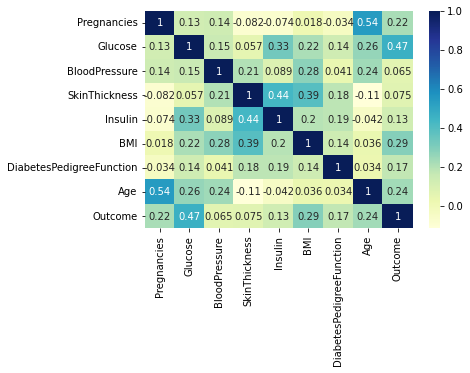

In [ ]:
matrix = dataset.corr()
print("Correlation matrix is : ")
print(matrix)
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

<Figure size 720x720 with 0 Axes>

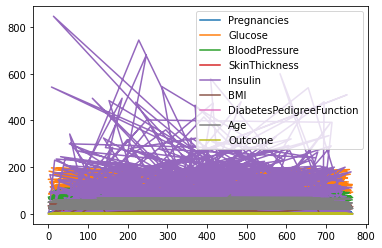

In [ ]:
plt.figure(figsize=(10,10))
dataset.plot()

#Modelling
a. Build a Linear Regression Model.
1. MAE, MSE, and RMSE results.
2. Linear Regression R2 score.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

list_of_num = ['int64','float64']
numeric_df = dataset.select_dtypes(list_of_num)
numeric_df.head()

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns

vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i)
                          for i in range(len(numeric_df.columns))]

(vif_data.sort_values("VIF"))

,feature,VIF
8,Outcome,1.948398
4,Insulin,2.063940
6,DiabetesPedigreeFunction,3.213450
0,Pregnancies,3.364416
3,SkinThickness,4.008709
7,Age,13.500531
2,BloodPressure,15.313159
1,Glucose,18.030209
5,BMI,18.515112


In [ ]:
lst=['Pregnancies','Glucose','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']

In [ ]:
dframe=pd.DataFrame(lst)

In [ ]:
X, y = dataset[['Pregnancies','Glucose','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']], dataset["Outcome"]
print("Initial shape",X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training Data: ",X_train.shape, y_train.shape)
print("Testing Data: ",X_test.shape, y_test.shape)

Initial shape (768, 7) (768,)
Training Data:  (614, 7) (614,)
Testing Data:  (154, 7) (154,)


In [ ]:
X

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
268,0,102,0,0,25.1,21,0.078
566,1,99,30,18,38.6,21,0.412
627,0,132,0,0,32.4,21,0.393
392,1,131,14,415,23.7,21,0.389
163,2,100,23,0,29.7,21,0.368
...,...,...,...,...,...,...,...
684,5,136,0,0,0.0,69,0.640
123,5,132,0,0,26.8,69,0.186
666,4,145,18,0,32.5,70,0.235
453,2,119,0,0,19.6,72,0.832


In [ ]:
y

268    0
566    0
627    0
392    0
163    0
      ..
684    0
123    0
666    1
453    0
459    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
model = LinearRegression()
model.fit((X_train), y_train)

LinearRegression()

In [ ]:
array = dataset.to_numpy()
array


array([[0.00e+00, 1.02e+02, 5.20e+01, ..., 7.80e-02, 2.10e+01, 0.00e+00],
       [1.00e+00, 9.90e+01, 7.20e+01, ..., 4.12e-01, 2.10e+01, 0.00e+00],
       [0.00e+00, 1.32e+02, 7.80e+01, ..., 3.93e-01, 2.10e+01, 0.00e+00],
       ...,
       [4.00e+00, 1.45e+02, 8.20e+01, ..., 2.35e-01, 7.00e+01, 1.00e+00],
       [2.00e+00, 1.19e+02, 0.00e+00, ..., 8.32e-01, 7.20e+01, 0.00e+00],
       [9.00e+00, 1.34e+02, 7.40e+01, ..., 4.60e-01, 8.10e+01, 0.00e+00]])

In [ ]:
y_predict=model.predict(X_train)
mae=metrics.mean_absolute_error(y_train, y_predict)
print(mae)
mse=metrics.mean_squared_error(y_train, y_predict)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_train, y_predict))
print(rmse)
R2_score=metrics.r2_score(y_train,y_predict)
print(R2_score)

0.33881167668170536
0.16193226768306593
0.40240808600606665
0.2928387407626133
